<h1>Proyecto Final</h1>
<h3>Felipe Villarroel L.</h3>

CONSULTA DE INDICADORES ECONOMICOS DE CHILE
************************************
Escoja una opción para continuar:
1. Consultar todos los indicadores económicos
2. Consulta moneda específica
3. Estaciones Climáticas
7 Comparativa de gráfica de condiciones
4. Consulta Estación específica
5. Últimos Sismos
6. Consulta Sismos por fecha
7. Gráfico de sismos
0. Salir
7


TypeError: list indices must be integers or slices, not str

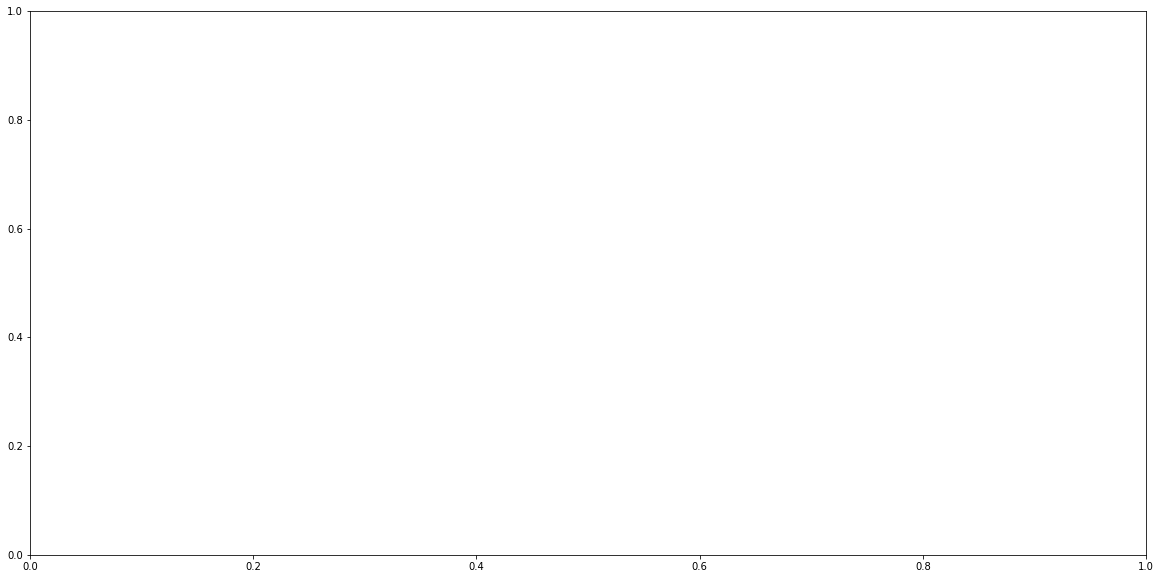

In [77]:
import requests
import matplotlib.pyplot as plt

def monedasTodas():
    url = "https://api.gael.cl/general/public/monedas"
    
    res = requests.get(url)
    res = res.json()
    #print(res[0])

    archivo = open("Monedas.txt", "w")
    
    for elemento in res:
        print(elemento)
        archivo.write(str(elemento)+"\n")
        
    archivo.close()

    
def monedaEspecifica():
    url = "https://api.gael.cl/general/public/monedas/"
    tipo = input("Ingrese código de moneda: ")
    
    res = requests.get(url+tipo)
    res = res.json()
    
    for llave, valor in res.items():
        print(llave+":", valor)

    
        
def clima():
    url = "https://api.gael.cl/general/public/clima"
    
    res = requests.get(url)
    res = res.json()
    
    archivo = open("Estaciones Climaticas.txt", "w")
    
    for elemento in res:
        print(elemento)
        archivo.write(str(elemento)+"\n")
        
    archivo.close()
    


    
def climaEspecifico():
    url = "https://api.gael.cl/general/public/clima/"
    tipo = input("Ingrese código de estación: ")
    
    res = requests.get(url+tipo)
    res = res.json()
    
    for llave, valor in res.items():
        print(llave+":", valor)

def sismos():
    url = "https://api.gael.cl/general/public/sismos"
    
    res = requests.get(url)
    res = res.json()

    archivo = open("Sismos.txt", "w")
    
    for elemento in res:
        archivo.write(str(elemento)+"\n")
        print("Fecha:", elemento["Fecha"])
        print("- Latitud:", elemento["Latitud"])
        print("- Longitud:", elemento["Longitud"])
        print("- Profundidad:", elemento["Profundidad"])
        print("- Magnitud:", elemento["Magnitud"])
        print("- Agencia", elemento["Agencia"])
        print("- Referencia Geográfica:", elemento["RefGeografica"])
        print("- Fecha Actualización:", elemento["FechaUpdate"])
        
        
    archivo.close()
    
def sismosPorFecha():
    url = "https://api.gael.cl/general/public/sismos"
    fecha = input("Ingrese fecha de la forma AAAA/MM/DD. Considerar fecha entre ayer y hoy.")
    
    res = requests.get(url)
    res = res.json()
    i = 0
    
    for elemento in res:
        if elemento["Fecha"][0:10] == fecha:
            print("Fecha:", elemento["Fecha"])
            print("- Latitud:", elemento["Latitud"])
            print("- Longitud:", elemento["Longitud"])
            print("- Profundidad:", elemento["Profundidad"])
            print("- Magnitud:", elemento["Magnitud"])
            print("- Agencia:", elemento["Agencia"])
            print("- Referencia Geográfica:", elemento["RefGeografica"])
            print("- Fecha Actualización:", elemento["FechaUpdate"])
            i = i + 1
            
    if i == 0:
        print("No hay sismos registros de la fecha indicada")           
            
def graficos():
    url = "https://api.gael.cl/general/public/sismos"
    
    res = requests.get(url)
    res = res.json()
    listaSismos = []
    
    for elemento in res:
        listaSismos.append(elemento)
        
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.plot(listaSismos["Fecha"], listaSismos["Magnitud"])
    plt.ylabel("Temperatura")
    plt.xlabel("Ciudades")
    ax.set_xticklabels(listaSismos["Fecha"], rotation=45 )
    plt.show()

#PROGRAMA:

print("CONSULTA DE INDICADORES ECONOMICOS DE CHILE")
respuesta = 10

while respuesta != 0:
    
    print("************************************")
    print("Escoja una opción para continuar:")
    print("1. Consultar todos los indicadores económicos")
    print("2. Consulta moneda específica")
    print("3. Estaciones Climáticas")
    print("7 Comparativa de gráfica de condiciones")
    print("4. Consulta Estación específica")
    print("5. Últimos Sismos")
    print("6. Consulta Sismos por fecha")
    print("7. Gráfico de sismos")
    print("0. Salir")
    respuesta = int(input())
    
    if respuesta == 1:
        print("Valor de todos los indicadores")
        print(monedasTodas())
    if respuesta == 2:        
        print(monedaEspecifica())
    if respuesta == 3:
        print(clima())
    if respuesta == 4:
        print(climaEspecifico())
    if respuesta == 5:
        print(sismos())
    if respuesta == 6:
        print(sismosPorFecha())
    #if respuesta == 7:
        #print(graficos())
    if respuesta == 0:
        print("Gracias por su tiempo, hasta pronto!")
        break
    else:
        print("Debe escoger un número de los indicados para continuar")